In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
#X_train
from sklearn.model_selection import train_test_split
# prepocessing data
yy=pd.read_csv('ydata.csv')
x=pd.read_csv('xdata.csv')
x=x.iloc[:,1:]
x = preprocessing.scale(x)
label=yy.iloc[:,3]
label=np.array(label)
label
label=label.reshape(label.shape[0],1)
print(label.shape)

(10113, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if sys.path[0] == '':


In [ ]:
X_tr, X_vld, lab_tr, lab_vld = train_test_split(x, label, 
                                                 random_state = 123)

In [ ]:
import tensorflow as tf
lr=0.001#learning rate
epochs=6000
w=4 # parameter for weighted loss
inputs_ = tf.placeholder(tf.float32, [None,47])     # input x
labels_ = tf.placeholder(tf.float32, [None,1])     # input y

# neural network layers
l1 = tf.layers.dense(inputs_, 16, tf.nn.relu)#25,10 ->249.14749
l2 = tf.layers.dense(l1, 8, tf.nn.relu)
logits=tf.layers.dense(l2,1)

In [ ]:
prediction=tf.nn.sigmoid(logits)


cost = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(targets=labels_,logits=logits,pos_weight=w))#4 classes
global_step = tf.Variable(0)

learning_rate = tf.train.exponential_decay(lr, global_step, 50, 0.96, staircase=True) 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost,global_step=global_step)

# Calculate the correct predictions
correct_prediction = tf.to_float(tf.greater(prediction, 0.5))
accuracy = tf.reduce_mean(tf.to_float(tf.equal(labels_, correct_prediction)))

In [ ]:
#  accuaracy of positive examples and negtive examples
accc=tf.equal(labels_, correct_prediction)
N1=tf.reduce_sum(labels_)
N=tf.reduce_sum(tf.ones_like(labels_))
N0=N-N1
mask_1=tf.equal(labels_,tf.ones_like(labels_))
accp=tf.reduce_mean(tf.to_float(tf.boolean_mask(accc, mask_1)))
mask_0=tf.equal(labels_,tf.zeros_like(labels_))
accn=tf.reduce_mean(tf.to_float(tf.boolean_mask(accc, mask_0)))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
   
    # Loop over epochs
    for e in range(epochs):

            train,_,_,_=sess.run([accuracy, optimizer,learning_rate,global_step], feed_dict={inputs_ :  X_tr, labels_: lab_tr})
                
            #, feature_:featuretrain
            # Print at each 5 iters
            if (e % 50 == 0):
                
                #acc=sess.run(accuracy, feed_dict={inputs_ : X_train, labels_: label, feature_: feature, tf_is_training: False})
                acp,acn,acctest=sess.run([accp,accn,accuracy], feed_dict={inputs_ : X_vld, labels_: lab_vld})
                print("Epoch: {}/{}".format(e, epochs),
                      "Train loss: {:6f}".format(train),
                      "Test acc: {:.6f}".format(acctest),
                      "Test accp: {:.6f}".format(acp),
                      "Test accn: {:.6f}".format(acn))

Epoch: 0/6000 Train loss: 0.417194 Test acc: 0.412021 Test accp: 0.552000 Test accn: 0.366071
Epoch: 50/6000 Train loss: 0.607068 Test acc: 0.607750 Test accp: 0.811200 Test accn: 0.540966
Epoch: 100/6000 Train loss: 0.662975 Test acc: 0.675761 Test accp: 0.808000 Test accn: 0.632353
Epoch: 150/6000 Train loss: 0.688555 Test acc: 0.693159 Test accp: 0.800000 Test accn: 0.658088
Epoch: 200/6000 Train loss: 0.701609 Test acc: 0.705022 Test accp: 0.800000 Test accn: 0.673845
Epoch: 250/6000 Train loss: 0.707410 Test acc: 0.705813 Test accp: 0.792000 Test accn: 0.677521
Epoch: 300/6000 Train loss: 0.715058 Test acc: 0.711348 Test accp: 0.793600 Test accn: 0.684349
Epoch: 350/6000 Train loss: 0.719541 Test acc: 0.715302 Test accp: 0.795200 Test accn: 0.689076
Epoch: 400/6000 Train loss: 0.723761 Test acc: 0.717675 Test accp: 0.796800 Test accn: 0.691702
Epoch: 450/6000 Train loss: 0.724420 Test acc: 0.723211 Test accp: 0.796800 Test accn: 0.699055
Epoch: 500/6000 Train loss: 0.725475 Test a

In [ ]:
def ROC(T):
  
  cost = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(targets=labels_,logits=logits,pos_weight=T))
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost,global_step=global_step)
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
   
    # Loop over epochs
    for e in range(epochs):
        
     
            train,_,_,_=sess.run([accuracy, optimizer,learning_rate,global_step], feed_dict={inputs_ :  X_tr, labels_: lab_tr})
                
           
                
              
    acp,acn,acctest=sess.run([accp,accn,accuracy], feed_dict={inputs_ : X_vld, labels_: lab_vld})
  return [acp,acn]


In [ ]:
h_test_list=[]# POSITIVE ACCUARACY
n_test_list=[]#NEGTIVE ACCURACY

for i in range(10):
  T=84-8*i
  acp,acn=ROC(T)
  h_test_list.append(acp)
  n_test_list.append(acn)
  
  
for i in range(25):
  T=4-0.1*i#   tune T for weigheed loss function in NN
  acp,acn=ROC(T)
  h_test_list.append(acp)
  n_test_list.append(acn)



In [ ]:
for i in range(15):
  T=1.5-0.1*i
  acp,acn=ROC(T)
  h_test_list.append(acp)
  n_test_list.append(acn)

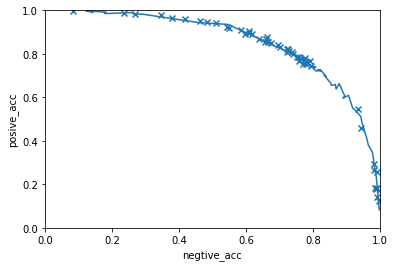

In [ ]:
plt.figure()
plt.xlim((0, 1))

plt.ylim((0, 1))
plt.plot(n_test_list[0:50],  h_test_list[0:50])                    
plt.scatter(h_test_list[0:50], n_test_list[0:50], marker='x')
plt.ylabel('posive_acc')
plt.xlabel('negtive_acc')

plt.show()
#roc plot

In [ ]:
plt.savefig('fig_cat.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
   
    # Loop over epochs
    for e in range(epochs):
        
        # Loop over batches
        
           
            #loss, _  =sess.run([cost, optimizer], feed_dict={inputs_ : X_train, labels_: label, feature_: feature, tf_is_training: True})
            train,_,_,_=sess.run([accuracy, optimizer,learning_rate,global_step], feed_dict={inputs_ :  X_tr, labels_: lab_tr})
                
            #, feature_:featuretrain
            # Print at each 5 iters
            
                
                #acc=sess.run(accuracy, feed_dict={inputs_ : X_train, labels_: label, feature_: feature, tf_is_training: False})
    acp,acn,acctest=sess.run([accp,accn,accuracy], feed_dict={inputs_ : X_vld, labels_: lab_vld})

In [ ]:
ACP,ACN=ROC(4)

In [ ]:
print(ACP)
print(ACN)

0.9952
0.16228992


In [ ]:
h_test_list=[]
h_test_list.append(ACP)